데이터 다운로드


*   https://data.kma.go.kr/cmmn/main.do
*   기온통계분석 - 기온분석 - 기간/지역설정 - csv 다운로드
*   19040101-20230710 , 서울 기온데이터



기온데이터 읽어오기

In [ ]:
import csv

# 1) 파일을 연다.
f = open('/content/seoul_2023.csv', 'r', encoding = 'euc-kr') # 인코딩 필수 -> 깨지는 오류 발생

# 2)csv 파일을 읽는다.
data = csv.reader(f, delimiter=',') # delimiter -> 구분짓는 것 (기본 ','로 데이터를 분류시킴) -> ',' 이면 delimiter 생략 가능

# 3) 파일을 닫는다. -> 파일을 닫았기 때문에 아무 결과도 나타나자 않음.
f.close()

헤더 저장하기

In [ ]:
import csv

# 1) 파일을 연다.
f = open('/content/seoul_2023.csv', 'r', encoding = 'euc-kr')

# 2)csv 파일을 읽는다.
data = csv.reader(f, delimiter=',')

# 헤더(데이터 정보) 저장하기
header = next(data) # next() 함수는 한줄 읽고, 커서(읽어드릴 위치) 한칸 이동
print(header)

# print(next(data)) 커서가 한줄 내려감

# 3) 파일을 닫는다.
f.close()

['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']


데이터 불러와서 최고기온 출력하기

In [ ]:
import csv

# 1) 파일을 연다.
f = open('/content/seoul_2023.csv', 'r', encoding = 'euc-kr')

# 2)csv 파일을 읽는다.
data = csv.reader(f, delimiter=',')

# 헤더(데이터 정보) 저장하기
header = next(data) # next() 함수는 한줄 읽고, 커서(읽어드릴 위치) 한칸 이동

# 2) 기온 데이터 출력 -> 날짜와 최고 기온만 출력
for row in data :
  #print(row) 리스트 단위로 출력, 문자열 형태
  # 2-1 ) 결측치 데이터 처리 -> 명확한 결과를 위해 극적인 값으로 초기화
  if row[-1] == '' :
    row[-1] = -999 # 절대 나올 수 없는 극적인 값으로 초기화 시킴
  print(row[0], float(row[-1]))

# 3) 파일을 닫는다.
f.close()

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
2009-11-01 13.4
2009-11-02 5.2
2009-11-03 6.1
2009-11-04 16.3
2009-11-05 17.9
2009-11-06 19.7
2009-11-07 20.0
2009-11-08 19.8
2009-11-09 21.8
2009-11-10 14.7
2009-11-11 13.9
2009-11-12 12.4
2009-11-13 10.3
2009-11-14 8.8
2009-11-15 1.9
2009-11-16 1.0
2009-11-17 1.9
2009-11-18 3.1
2009-11-19 5.9
2009-11-20 4.8
2009-11-21 3.8
2009-11-22 6.8
2009-11-23 12.3
2009-11-24 13.5
2009-11-25 7.5
2009-11-26 13.2
2009-11-27 8.5
2009-11-28 9.1
2009-11-29 7.5
2009-11-30 9.6
2009-12-01 10.1
2009-12-02 8.0
2009-12-03 5.9
2009-12-04 8.1
2009-12-05 5.6
2009-12-06 -0.3
2009-12-07 5.1
2009-12-08 3.8
2009-12-09 8.6
2009-12-10 8.5
2009-12-11 8.8
2009-12-12 7.8
2009-12-13 6.2
2009-12-14 3.6
2009-12-15 -1.5
2009-12-16 -3.0
2009-12-17 -3.2
2009-12-18 -5.7
2009-12-19 -4.3
2009-12-20 -0.9
2009-12-21 0.5
2009-12-22 7.8
2009-12-23 7.7
2009-12-24 6.7
2009-12-25 4.0
2009-12-26 -4.6
2009-12-27 -5.5
2009-12-28 -5.4
2009-12-29 1.6
2009-12-30 1.8
2009-12-31 -8.3
2010-01-01 -3.6
2010-01

기상 관측 이래, 서울의 최고 기온이 가장 높았던 날은 언제고 몇도 였을까?

In [ ]:
import csv

max_temp = -999 # 최고 기온 값을 저장 할 변수 -> 명확한 값을 위해 극적으로 초기값 설정
max_date = '' # 최고 기온이 가장 높았던 날짜를 저장 할 변수 -> 빈 형태로 초기 값 설정

# 1) 파일을 연다.
f = open('/content/seoul_2023.csv', 'r', encoding = 'euc-kr')

# 2) csv 파일을 읽는다.
data = csv.reader(f, delimiter=',')

# 헤더(데이터 정보) 저장하기
header = next(data) # next() 함수는 한줄 읽고, 커서(읽어드릴 위치) 한칸 이동

# 2) 기온 데이터 출력 -> 날짜와 최고 기온만 출력
for row in data :
  #print(row) 리스트 단위로 출력, 문자열 형태
  # 2-1) 결측치 데이터 처리 -> 명확한 결과를 위해 극적인 값으로 초기화
  if row[-1] == '' :
    row[-1] = -999

  # 2-2) 최고 기온 실수형으로 형변환
  row[-1] = float(row[-1])

  # 3) 최고 기온과 날짜 찾기
  if max_temp < row[-1] :
    max_temp = row[-1] # 최고 기온
    max_date = row[0] # 최고 기온의 날짜

# 4) 파일을 닫는다.
f.close()

# 5) 결과 출력

print('기상 관측 이래, 서울의 최고 기온이 높았던 날은 %s로 %.2f 였습니다.' %(max_date, max_temp))

기상 관측 이래, 서울의 최고 기온이 높았던 날은 2018-08-01로 39.60 였습니다.


기상 관측 이래, 서울의 최저 기온이 가장 낮았던 날은 언제고 몇도 였을까?

In [ ]:
import csv

min_temp = 999 # 최고 기온 값을 저장 할 변수 -> 명확한 값을 위해 극적으로 초기값 설정
min_date = '' # 최고 기온이 가장 높았던 날짜를 저장 할 변수 -> 빈 형태로 초기 값 설정

# 1) 파일을 연다.
f = open('/content/seoul_2023.csv', 'r', encoding = 'euc-kr')

# 2) csv 파일을 읽는다.
data = csv.reader(f, delimiter=',')

# 헤더(데이터 정보) 저장하기
header = next(data) # next() 함수는 한줄 읽고, 커서(읽어드릴 위치) 한칸 이동

# 2) 기온 데이터 출력 -> 날짜와 최저 기온만 출력
for row in data :
  #print(row) 리스트 단위로 출력, 문자열 형태
  # 2-1) 결측치 데이터 처리 -> 명확한 결과를 위해 극적인 값으로 초기화
  if row[-2] == '' :
    row[-2] = 999

  # 2-2) 최저 기온 실수형으로 형변환
  row[-2] = float(row[-2])

  # 3) 최저 기온과 날짜 찾기
  if min_temp > row[-2] :
    min_temp = row[-2] # 최저 기온
    min_date = row[0] # 최저 기온의 날짜

# 4) 파일을 닫는다.
f.close()

# 5) 결과 출력

print('기상 관측 이래, 서울의 최저 기온이 낮았던 날은 %s로 %.2f 였습니다.' %(min_date, min_temp))

기상 관측 이래, 서울의 최저 기온이 낮았던 날은 1927-12-31로 -23.10 였습니다.


기본 그래프 그리기

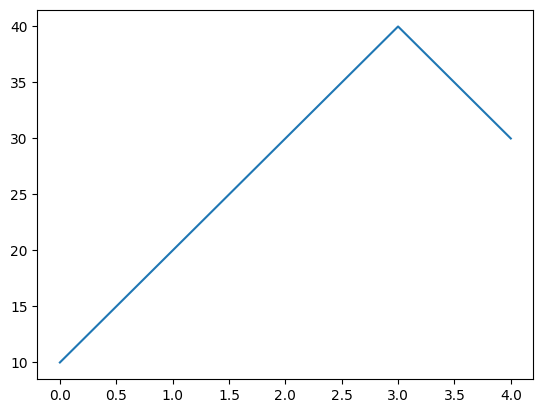

In [ ]:
import matplotlib.pyplot as plt

plt.plot([10, 20, 30, 40, 30]) # y 값 설정, x 값 -> index (0부터 증가시킴) + 리스트 형태로 입력

plt.show()


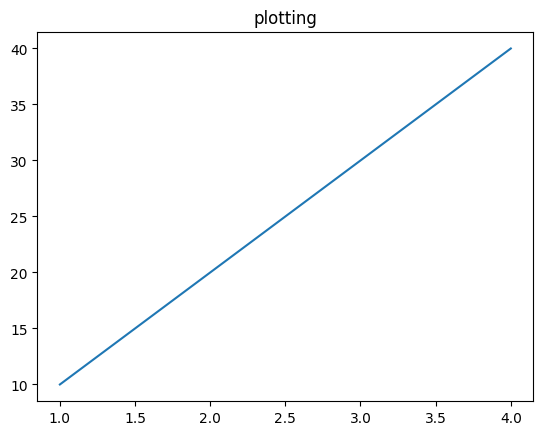

In [ ]:
plt.title('plotting') # 타이틀 속성 추가
plt.plot([1, 2, 3, 4],[10, 20, 30, 40]) # plt.plot(x,y) -> 즉, x값 y값 모두 설정해줌

plt.show()

matplotlib 기본 그래프 -> 여러개의 plot(x, y, label=")

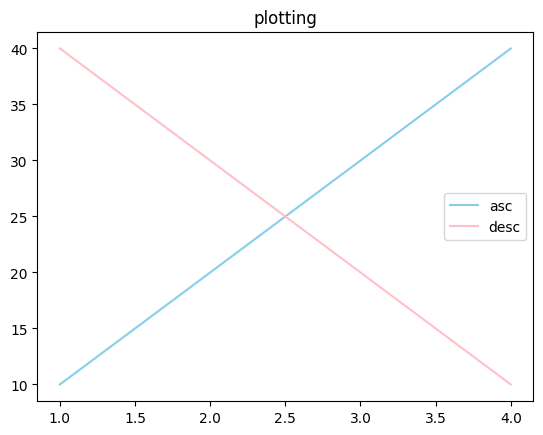

In [ ]:
plt.title('plotting') # 타이틀 속성 추가
plt.plot([1, 2, 3, 4],[10, 20, 30, 40], color= 'skyblue', label='asc') # color 와 label 추가하여 설정
plt.plot([1, 2, 3, 4],[40, 30, 20, 10], color= 'pink', label='desc')
plt.legend() # 범례 속성 추가
plt.show()

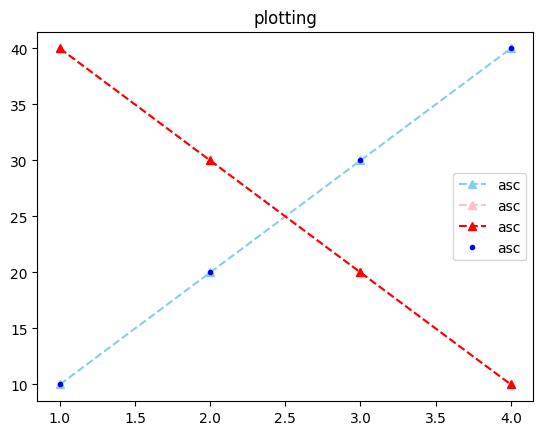

In [ ]:
from matplotlib import markers
plt.title('plotting') # 타이틀 속성 추가
plt.plot([1, 2, 3, 4],[10, 20, 30, 40], color= 'skyblue', marker='^', linestyle ='--',label='asc') #marker, linestyle 추가
plt.plot([1, 2, 3, 4],[40, 30, 20, 10], c= 'pink', marker='^', ls ='--',label='asc') # 더 간단하게 c와 ls 사용
plt.plot([1, 2, 3, 4],[40, 30, 20, 10],'r^--',label='asc') # red색으로 ^로 값 표시, --로 그래프 그림
plt.plot([1, 2, 3, 4],[10, 20, 30, 40],'b.',label='asc') # red색으로 ^로 값 표시, --로 그래프 그림
plt.legend() # 범례 속성 추가
plt.show()

기온 데이터 시각화

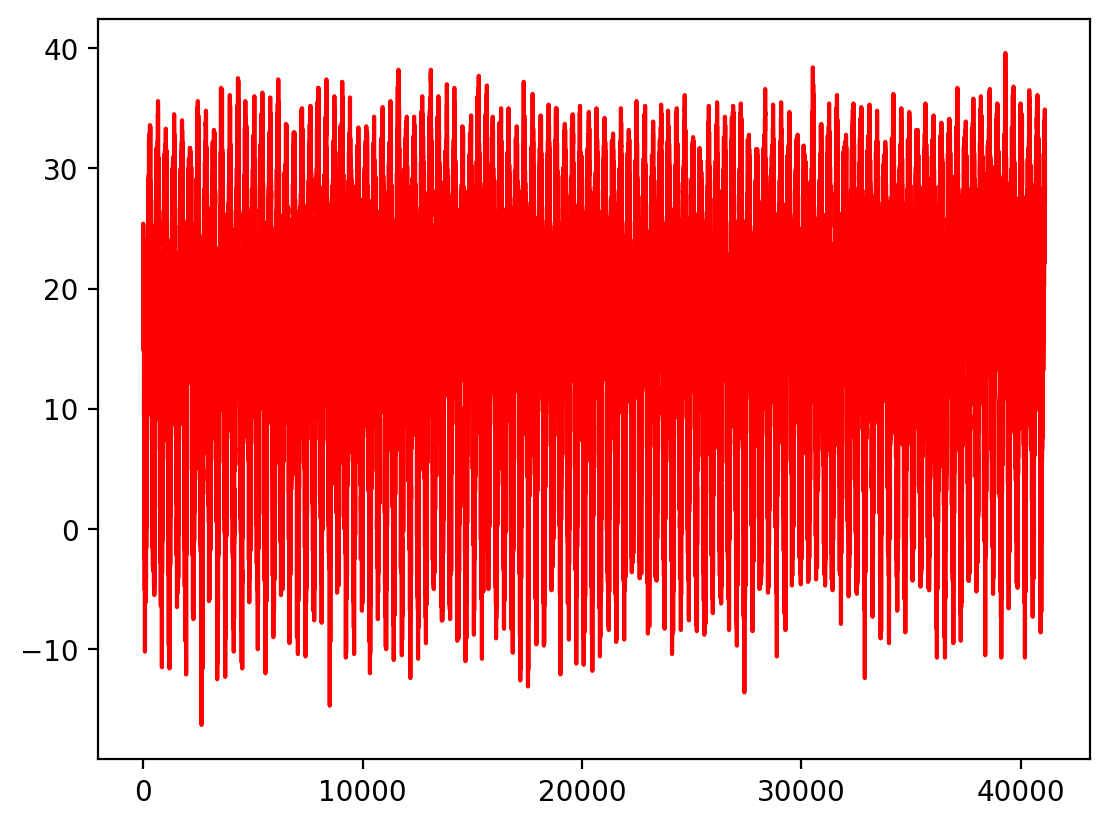

In [ ]:
# 관측 이래, 서울의 최고 기온 데이터를 시각화
import csv
import matplotlib.pyplot as plt # 라이브러리는 순서대로

# 1) 최고 기온 데이터를 담을 리스트 선언
result = []

# 2) 파일을 연다.
f = open('/content/seoul_2023.csv', 'r', encoding = 'euc-kr')

# 3)csv 파일을 읽는다.
data = csv.reader(f, delimiter=',')

# 3-1) 헤더(데이터 정보) 저장하기
header = next(data) # next() 함수는 한줄 읽고, 커서(읽어드릴 위치) 한칸 이동

# 3-2) 최고 기온 result 리스트에 담기
for row in data :
  #print(row) 리스트 단위로 출력, 문자열 형태
  # 3-1-1 ) 결측치 데이터 처리 -> result 리스트에 담지 않기
  if row[-1] != '' :
    result.append(float(row[-1])) # 결측치가 아닌 최고 기온 데이터 실수형 변환하여 result 리스트에 담기

# 4) 파일을 닫는다.
f.close()

# 5) 최고 기온 데이터 시각화
plt.figure(dpi=200)
plt.plot(result, 'r')
plt.show()



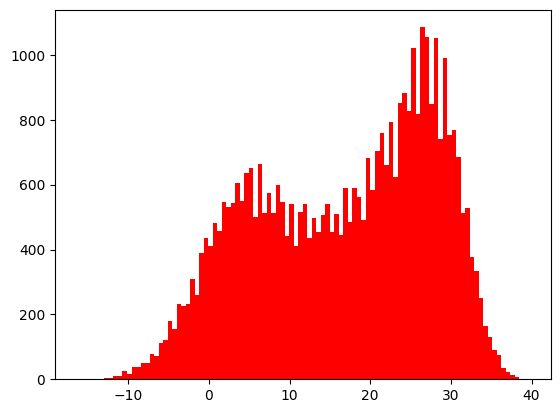

In [ ]:
# 관측 이래, 서울의 최고 기온 데이터를 시각화
import csv
import matplotlib.pyplot as plt # 라이브러리는 순서대로

# 1) 최고 기온 데이터를 담을 리스트 선언
result = []

# 2) 파일을 연다.
f = open('/content/seoul_2023.csv', 'r', encoding = 'euc-kr')

# 3)csv 파일을 읽는다.
data = csv.reader(f, delimiter=',')

# 3-1) 헤더(데이터 정보) 저장하기
header = next(data) # next() 함수는 한줄 읽고, 커서(읽어드릴 위치) 한칸 이동

# 3-2) 최고 기온 result 리스트에 담기
for row in data :
  #print(row) 리스트 단위로 출력, 문자열 형태
  # 3-1-1 ) 결측치 데이터 처리 -> result 리스트에 담지 않기
  if row[-1] != '' :
    result.append(float(row[-1])) # 결측치가 아닌 최고 기온 데이터 실수형 변환하여 result 리스트에 담기

# 4) 파일을 닫는다.
f.close()

# 5) 최고 기온 데이터 시각화 -- > 히스토그램
plt.figure(dpi=100)

plt.hist(result, bins=100, color = 'r') # bins 추가 -> 더 디테일하게 표현 가능
plt.show()

